<a href="https://colab.research.google.com/github/RamithGowda/WordForThought/blob/main/Week%201/Ramith_Gowda/IC_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print(tf.__version__)
import gdown
gdown.download(url='https://drive.google.com/uc?id=1CjhNulNquoA8gWQtmHD83ib5t8lGBGC1',output='animal_data')
!unzip animal_data -d ./animals_data

2.17.1


Downloading...
From (original): https://drive.google.com/uc?id=1CjhNulNquoA8gWQtmHD83ib5t8lGBGC1
From (redirected): https://drive.google.com/uc?id=1CjhNulNquoA8gWQtmHD83ib5t8lGBGC1&confirm=t&uuid=521b146d-9788-4fb0-a00f-9b79ce159b06
To: /content/animal_data
100%|██████████| 38.9M/38.9M [00:00<00:00, 69.3MB/s]


Archive:  animal_data
   creating: ./animals_data/animal_data/
  inflating: ./animals_data/__MACOSX/._animal_data  
   creating: ./animals_data/animal_data/Cat/
  inflating: ./animals_data/__MACOSX/animal_data/._Cat  
   creating: ./animals_data/animal_data/Dog/
  inflating: ./animals_data/__MACOSX/animal_data/._Dog  
   creating: ./animals_data/animal_data/Dolphin/
  inflating: ./animals_data/__MACOSX/animal_data/._Dolphin  
   creating: ./animals_data/animal_data/Giraffe/
  inflating: ./animals_data/__MACOSX/animal_data/._Giraffe  
   creating: ./animals_data/animal_data/Bear/
  inflating: ./animals_data/__MACOSX/animal_data/._Bear  
   creating: ./animals_data/animal_data/Zebra/
  inflating: ./animals_data/__MACOSX/animal_data/._Zebra  
   creating: ./animals_data/animal_data/Panda/
  inflating: ./animals_data/__MACOSX/animal_data/._Panda  
   creating: ./animals_data/animal_data/Tiger/
  inflating: ./animals_data/__MACOSX/animal_data/._Tiger  
   creating: ./animals_data/animal_dat

In [2]:
import os
os.listdir('./animals_data/animal_data')
train_data = tf.keras.utils.image_dataset_from_directory(
    directory='./animals_data/animal_data',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=69,
    validation_split=0.2,
    subset='training'
)

test_data = tf.keras.utils.image_dataset_from_directory(
    directory='./animals_data/animal_data',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='validation'
)

Found 1944 files belonging to 15 classes.
Using 1556 files for training.
Found 1944 files belonging to 15 classes.
Using 388 files for validation.


(32, 224, 224, 3)
(32,)


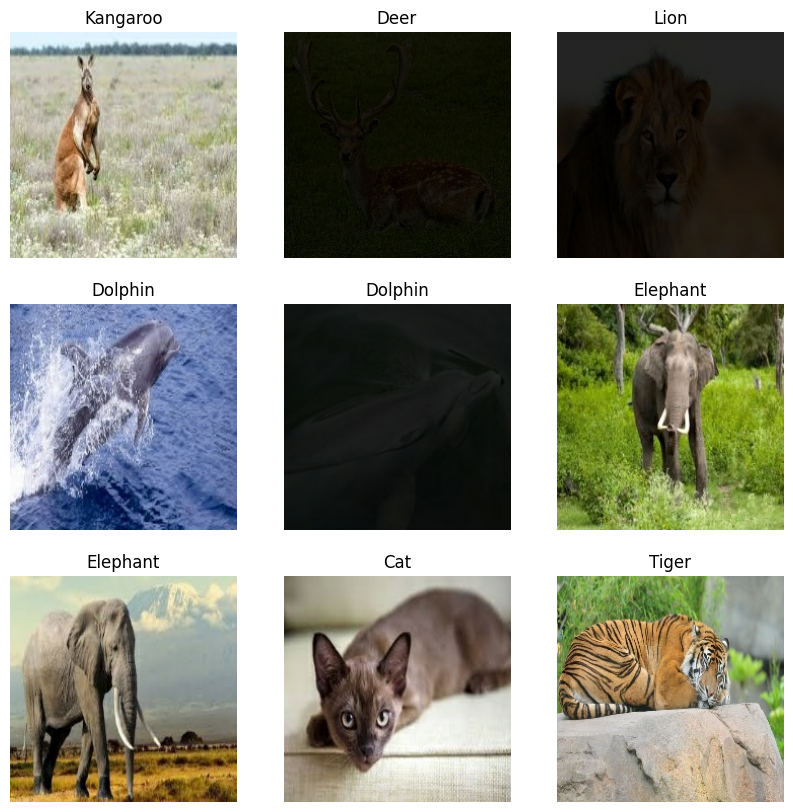

In [3]:
train_data.class_names
plt.figure(figsize=(10, 10))
for images,labels in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(train_data.class_names[labels[i]])
        plt.axis('off')

for image_batch, label_batch in train_data:
    print(image_batch.shape)
    print(label_batch.shape)
    break

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, (3, 3), strides=(1, 1), padding="valid", activation='relu'),
    tf.keras.layers.MaxPooling2D( pool_size=(2, 2), strides=None, padding="valid",),
    tf.keras.layers.Conv2D(64, (3, 3), strides=(1, 1),padding="valid", activation='relu'),
    tf.keras.layers.MaxPooling2D( pool_size=(2, 2), strides=None, padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(15, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=15
)

model.summary()

Epoch 1/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 131s 3s/step - accuracy: 0.0986 - loss: 3.6377 - val_accuracy: 0.3711 - val_loss: 2.2190
Epoch 2/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - accuracy: 0.4144 - loss: 1.9659 - val_accuracy: 0.6418 - val_loss: 1.3010
Epoch 3/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step - accuracy: 0.7688 - loss: 0.9004 - val_accuracy: 0.8711 - val_loss: 0.7101
Epoch 4/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 0.9341 - loss: 0.3297 - val_accuracy: 0.9046 - val_loss: 0.5610
Epoch 5/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 0.9614 - loss: 0.1620 - val_accuracy: 0.9433 - val_loss: 0.5652
Epoch 6/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step - accuracy: 0.9889 - loss: 0.0604 - val_accuracy: 0.9433 - val_loss: 0.4905
Epoch 7/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 1.0000 - loss: 0.0262 - val_accuracy: 0.9407 - val_loss: 0.5142
Epoch 8/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step - accuracy: 0.9997 - loss: 0.0144 - val_accuracy: 0.9381 - v

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │      11,944,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │             975 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,893,103 (136.92 MB)

 Trainable params: 11,964,367 (45.64 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,928,736 (91.28 MB)

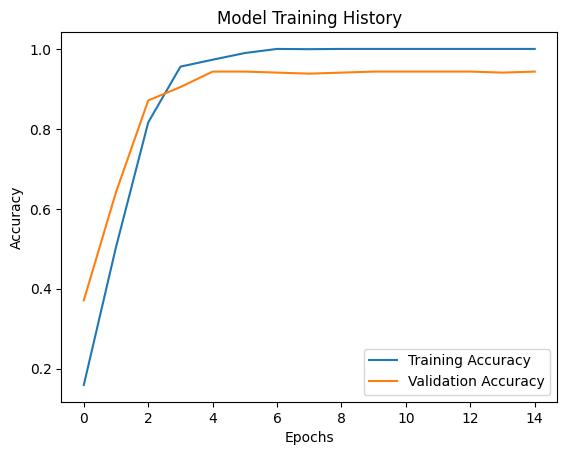

13/13 - 9s - 709ms/step - accuracy: 0.9433 - loss: 0.7539

Test accuracy: 0.9432989954948425


In [5]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Training History')
plt.show()

test_loss, test_acc = model.evaluate(test_data, verbose=2)
print('\nTest accuracy:', test_acc)